In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
coords = ((0.0, 0.0),
 (0.0, 25.0),
 (0.0, 50.0),
 (0.0, 75.0),
 (0.0, 100.0),
 (0.0, 125.0),
 (0.0, 150.0),
 (0.0, 175.0),
 (0.0, 200.0),
 (0.0, 225.0),
 (18.0, -12.5),
 (18.0, 37.5),
 (18.0, 87.5),
 (18.0, 137.5),
 (18.0, 187.5),
 (18.0, 237.5),
 (18.0, 262.5),
 (18.0, 212.5),
 (18.0, 162.5),
 (18.0, 112.5),
 (18.0, 62.5),
 (18.0, 12.5),
 (36.0, 225.0),
 (36.0, 200.0),
 (36.0, 175.0),
 (36.0, 150.0),
 (36.0, 125.0),
 (36.0, 100.0),
 (36.0, 75.0),
 (36.0, 50.0),
 (36.0, 25.0),
 (36.0, 0.0))

In [3]:
chans = range(1,len(coords) + 1) #.prb files are 0-based, probe and connector maps are 1-based

(-130, 170)

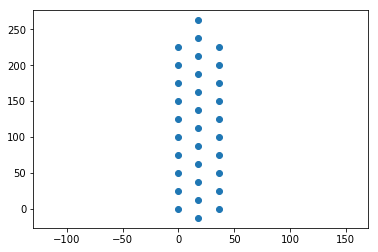

In [4]:
plt.plot([x for (x,y) in coords],[y for (x,y) in coords],'o')
plt.xlim([-130, 170])


In [5]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs
    

In [6]:
def translate_adjacencies(adjacencies, correspondence=None):
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return adjacencies

def translate(val, correspondence):
    return [y for (x,y) in correspondence if x == val][0]

def geometries(channels, geo):
    geometry = {}
    for i,ch in enumerate(channels):
        geometry[ch] = geo[i]
    return geometry

In [7]:
intan = [19,28,20,27,21,26,22,25,23,24,16,31,18,29,17,30,14,1,13,2,15,0,8,7,9,6,10,5,11,4,12,3]
 
nexus = [i for i in range(1,33)]
cor = list(zip(nexus, intan))

In [14]:
nexus_adj = adjacency_from_geometry(coords, nexus)

channel_groups_intan = {}
channel_groups_intan[0] = {}
channel_groups_intan[0]['channels'] = [translate(ch, cor) for ch in nexus]
channel_groups_intan[0]['graph'] = translate_adjacencies(nexus_adj,cor)
channel_groups_intan[0]['geometry'] = geometries([translate(ch, cor) for ch in nexus], coords)


In [15]:
channel_groups_intan

{0: {'channels': [19,
   28,
   20,
   27,
   21,
   26,
   22,
   25,
   23,
   24,
   16,
   31,
   18,
   29,
   17,
   30,
   14,
   1,
   13,
   2,
   15,
   0,
   8,
   7,
   9,
   6,
   10,
   5,
   11,
   4,
   12,
   3],
  'geometry': {0: (18.0, 12.5),
   1: (18.0, 212.5),
   2: (18.0, 112.5),
   3: (36.0, 0.0),
   4: (36.0, 50.0),
   5: (36.0, 100.0),
   6: (36.0, 150.0),
   7: (36.0, 200.0),
   8: (36.0, 225.0),
   9: (36.0, 175.0),
   10: (36.0, 125.0),
   11: (36.0, 75.0),
   12: (36.0, 25.0),
   13: (18.0, 162.5),
   14: (18.0, 262.5),
   15: (18.0, 62.5),
   16: (18.0, -12.5),
   17: (18.0, 187.5),
   18: (18.0, 87.5),
   19: (0.0, 0.0),
   20: (0.0, 50.0),
   21: (0.0, 100.0),
   22: (0.0, 150.0),
   23: (0.0, 200.0),
   24: (0.0, 225.0),
   25: (0.0, 175.0),
   26: (0.0, 125.0),
   27: (0.0, 75.0),
   28: (0.0, 25.0),
   29: (18.0, 137.5),
   30: (18.0, 237.5),
   31: (18.0, 37.5)},
  'graph': [(19, 0),
   (19, 28),
   (19, 16),
   (28, 0),
   (28, 19),
   (28, 31),
  